In [1]:
import pandas as pd
import cv2 as cv
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

In [24]:
data = pd.read_csv('data/hands/Training/Yoel Raz/Yoel636760923490742912Sync.csv')

In [25]:
data.describe()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
count,4500.000000,4500.000000,4500.0,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,818.858223,64248.162222,2.0,19.289938,208.916882,16.087010,0.619279,-2.669606,0.347644,1.025476,...,0.066849,14.557789,160.615363,35.959610,-5.632653,-9.654692,99.051636,0.132730,0.544647,0.118797
std,21.644830,1830.505387,0.0,122.600295,48.672518,41.290601,113.684149,148.808034,97.596199,0.689494,...,1.154982,157.068949,41.428887,33.511632,324.770483,53.896107,61.587527,0.314156,0.922204,0.290459
min,781.388500,61204.000000,2.0,-228.085500,108.853200,-74.619710,-822.561700,-1158.551000,-585.727800,-3.140563,...,-2.623188,-232.819600,86.751850,-62.614790,-447.885700,-145.826600,-118.323300,0.000000,0.000000,0.000000
25%,800.115200,62650.000000,2.0,-95.373468,174.671575,-11.125692,-41.764110,-63.125997,-44.314675,0.592183,...,-0.649145,-142.291850,133.742050,15.561702,-324.206825,-49.263160,67.292963,0.000000,0.000000,0.000000
50%,818.859150,64139.500000,2.0,12.422635,201.897800,12.112045,0.500818,3.168349,0.998525,1.045930,...,0.105294,23.068115,153.447850,34.234480,-14.434050,-20.791275,99.409125,0.000000,0.000000,0.000000
75%,837.601300,65949.000000,2.0,135.389900,236.540600,38.007165,42.992717,66.038560,43.215255,1.419437,...,0.907233,168.930850,180.928100,56.850965,315.169875,26.689725,135.950525,0.000000,0.673889,0.000000
max,856.329500,67314.000000,2.0,269.368900,416.641400,153.460900,914.587400,808.296400,515.217100,3.123045,...,2.889857,271.747000,374.312600,167.229400,445.917500,204.031400,271.045800,1.000000,3.141593,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             4500 non-null   float64
 1    Frame ID        4500 non-null   int64  
 2    Hand Type       4500 non-null   object 
 3    # hands         4500 non-null   int64  
 4    Position X      4500 non-null   float64
 5    Position Y      4500 non-null   float64
 6    Position Z      4500 non-null   float64
 7    Velocity X      4500 non-null   float64
 8    Velocity Y      4500 non-null   float64
 9    Velocity Z      4500 non-null   float64
 10   Pitch           4500 non-null   float64
 11   Roll            4500 non-null   float64
 12   Yaw             4500 non-null   float64
 13   Wrist Pos X     4500 non-null   float64
 14   Wrist Pos Y     4500 non-null   float64
 15   Wrist Pos Z     4500 non-null   float64
 16   Elbow pos X     4500 non-null   float64
 17   Elbow Pos Y  

In [27]:
data.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,781.3885,61204,left,2,-138.07600,414.4845,-38.02368,116.810800,-168.485200,132.76270,...,1.550665,-178.7890,352.9766,-44.79541,-378.9196,182.84700,-22.24459,0.0,0.0,0.0
1,781.3885,61204,right,2,91.39451,357.8610,30.57948,3.799189,44.763130,30.66022,...,-1.565256,120.9560,289.9398,26.45810,270.1054,77.22850,71.32717,0.0,0.0,0.0
2,781.4222,61207,left,2,-134.07100,404.4643,-32.66953,93.941740,-297.074500,153.94950,...,1.770319,-170.6620,341.7244,-45.61809,-377.4234,179.44490,-25.12566,0.0,0.0,0.0
3,781.4222,61207,right,2,90.77746,358.2465,31.77641,-27.008030,-4.661573,32.36538,...,-1.618731,120.6105,290.5419,26.64551,275.5173,81.70844,70.20367,0.0,0.0,0.0
4,781.4545,61209,left,2,-132.64130,399.4211,-29.42839,44.625880,-150.816000,116.15310,...,1.941646,-165.5956,335.7717,-46.27427,-363.0751,162.59110,-23.57652,0.0,0.0,0.0


In [49]:
left = data[data[' Hand Type'] == 'left']
right = data[data[' Hand Type'] == 'right']


In [42]:
left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 4498
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             2250 non-null   float64
 1    Frame ID        2250 non-null   int64  
 2    Hand Type       2250 non-null   object 
 3    # hands         2250 non-null   int64  
 4    Position X      2250 non-null   float64
 5    Position Y      2250 non-null   float64
 6    Position Z      2250 non-null   float64
 7    Velocity X      2250 non-null   float64
 8    Velocity Y      2250 non-null   float64
 9    Velocity Z      2250 non-null   float64
 10   Pitch           2250 non-null   float64
 11   Roll            2250 non-null   float64
 12   Yaw             2250 non-null   float64
 13   Wrist Pos X     2250 non-null   float64
 14   Wrist Pos Y     2250 non-null   float64
 15   Wrist Pos Z     2250 non-null   float64
 16   Elbow pos X     2250 non-null   float64
 17   Elbow Pos Y  

In [50]:
left = left.iloc[:,7:10]
left.head()

,Velocity X,Velocity Y,Velocity Z
0,116.810800,-168.48520,132.76270
2,93.941740,-297.07450,153.94950
4,44.625880,-150.81600,116.15310
6,-44.470170,132.26450,53.58884
8,-7.643621,11.16509,21.97683


In [51]:
right = right.iloc[:,7:10]
right.head()

,Velocity X,Velocity Y,Velocity Z
1,3.799189,44.763130,30.66022
3,-27.008030,-4.661573,32.36538
5,-31.981510,26.481490,43.76637
7,-26.074280,45.843150,62.63295
9,-26.682020,41.983730,86.31763


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

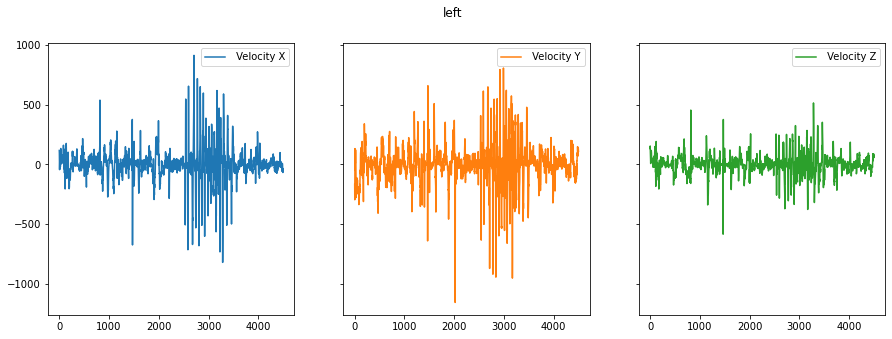

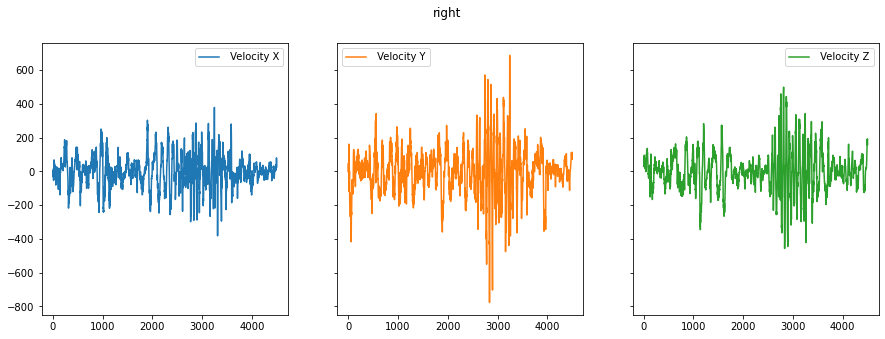

In [61]:
left.plot(title = "left",figsize = (15,5),subplots = True,layout =(1,3), sharey =True)
right.plot(title = "right",figsize = (15,5),subplots = True,layout =(1,3), sharey =True)

In [69]:
left_pct_change = left.diff(periods=1)
right_pct_change = right.diff(periods=1)

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

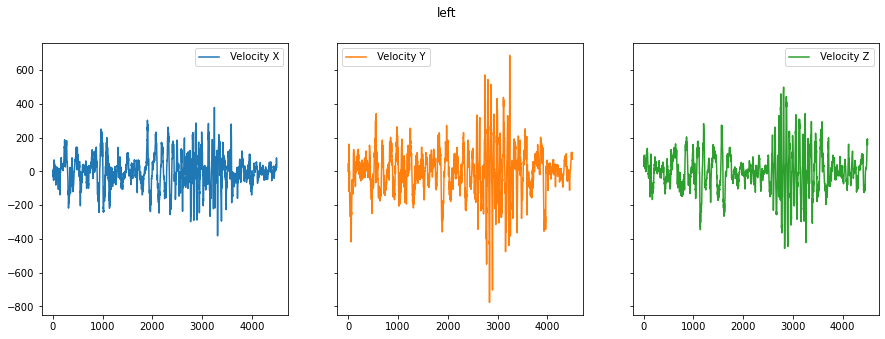

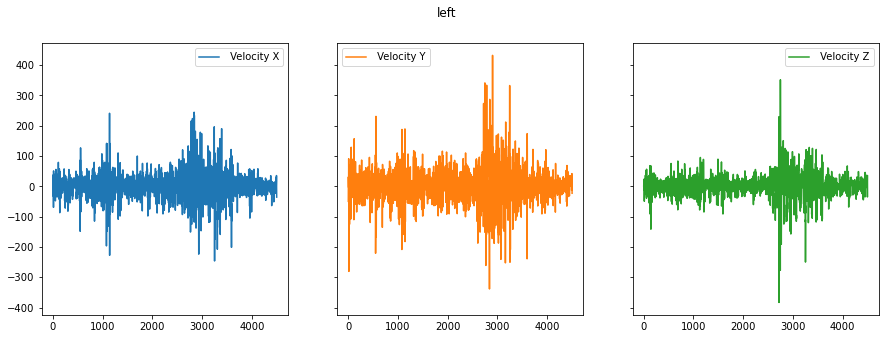

In [71]:
right.plot(title = "left",figsize = (15,5),subplots = True,layout =(1,3), sharey =True)
right_pct_change.plot(title = "left",figsize = (15,5),subplots = True,layout =(1,3), sharey =True)